In [1]:
import pandas as pd

In [5]:
data = pd.read_csv('../data/Датасет/train.csv', sep=';')

In [75]:
test = pd.read_csv('../data/Датасет/submission.csv', sep=';')

In [76]:
test

,sample,annotation
0,форма для выпечки,"[(0, 5, 'B-TYPE'), (6, 9, 'I-TYPE'), (10, 17, ..."
1,фарш свиной,"[(0, 4, 'B-TYPE'), (5, 11, 'I-TYPE')]"
2,сок ананасовый без сахара,"[(0, 3, 'B-TYPE'), (4, 14, 'I-TYPE'), (15, 18,..."
3,еринги,"[(0, 6, 'B-TYPE')]"
4,молооко,"[(0, 7, 'B-TYPE')]"
...,...,...
4995,milkywa,"[(0, 7, 'B-BRAND')]"
4996,очиститель для унитаза,"[(0, 10, 'B-TYPE'), (11, 14, 'I-TYPE'), (15, 2..."
4997,арбузные,"[(0, 8, 'B-TYPE')]"
4998,кашы,"[(0, 4, 'B-TYPE')]"


в тексте очень много опечаток. С этим нужно будет что-то делать

In [78]:
data[data['sample'].str.contains('молок')]

,sample,annotation,len_tokens,count_spaces
1633,neмолоко,"[(0, 8, B-TYPE)]",1,1
3315,безлактозное молоко,"[(0, 12, B-TYPE), (13, 19, I-TYPE)]",2,2
5524,гемолок,"[(0, 7, B-TYPE)]",1,1
5525,гемолоко,"[(0, 8, B-TYPE)]",1,1
6484,детское молоко,"[(0, 7, B-TYPE), (8, 14, I-TYPE)]",2,2
...,...,...,...,...
23857,трубочки бля молока,"[(0, 8, B-TYPE), (9, 12, O), (13, 19, O)]",3,3
23858,трубочки доя молока,"[(0, 8, B-TYPE), (9, 12, O), (13, 19, O)]",3,3
24975,хлеб домашний на молоке,"[(0, 4, B-TYPE), (5, 13, I-TYPE), (14, 16, O),...",4,4
26151,шарики для молока,"[(0, 6, B-TYPE), (7, 10, O), (11, 17, O)]",3,3


О ижмолоко - ижевское молоко)

In [80]:
data[data['sample'].isin(test['sample'])]

,sample,annotation,len_tokens,count_spaces


В тесте все уникальное запросы. Не получиться просто сматчить с трейном

In [19]:
data['annotation'] = data['annotation'].apply(eval)

In [28]:
data['len_tokens'] = data['annotation'].apply(len)

<Axes: ylabel='Frequency'>

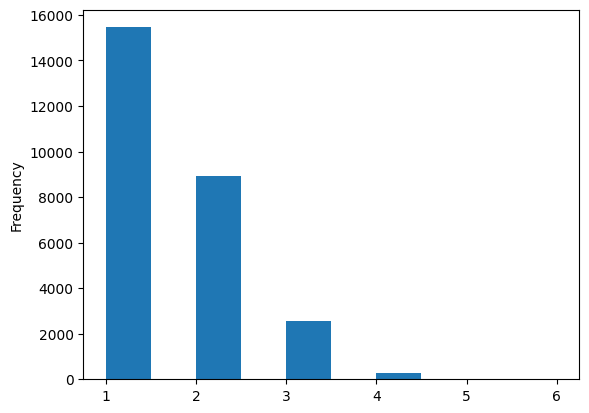

In [26]:
data['len_tokens'].plot(kind = 'hist')

Много данных всего с одим токеном

In [54]:
data['len_tokenss'] = data['sample'].str.count(' ') + 1

In [58]:
data[data['len_tokens'] != data['len_tokenss']]

,sample,annotation,len_tokens,count_spaces


токены бьются по пробелам

In [166]:
data.head(10).to_dict()

{'sample': {0: 'aa',
  1: 'aala',
  2: 'aarcca',
  3: 'abon',
  4: 'abso',
  5: 'abtoys игруш',
  6: 'abtoys игрушк',
  7: 'abtoys игрушки',
  8: 'acofe',
  9: 'actimal'},
 'annotation': {0: [(0, 2, 'O')],
  1: [(0, 4, 'O')],
  2: [(0, 6, 'O')],
  3: [(0, 4, 'O')],
  4: [(0, 4, 'B-BRAND')],
  5: [(0, 6, 'B-BRAND'), (7, 12, 'B-TYPE')],
  6: [(0, 6, 'B-BRAND'), (7, 13, 'B-TYPE')],
  7: [(0, 6, 'B-BRAND'), (7, 14, 'B-TYPE')],
  8: [(0, 5, 'O')],
  9: [(0, 7, 'B-BRAND')]},
 'len_tokens': {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 2, 6: 2, 7: 2, 8: 1, 9: 1},
 'count_spaces': {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 2, 6: 2, 7: 2, 8: 1, 9: 1}}

In [158]:
all_tuples = [item for sublist in data['annotation'] for item in sublist]

In [159]:
all_tuples = pd.DataFrame(all_tuples)

In [160]:
all_tuples.columns = 'start', 'end', 'type'

In [161]:
all_tuples['len'] = all_tuples['end'] - all_tuples['start']

In [162]:
all_tuples['type'].value_counts()

type
B-TYPE       24540
B-BRAND       7213
O             5379
I-TYPE        4522
I-BRAND        485
B-VOLUME        57
I-VOLUME        27
B-PERCENT       26
I-PERCENT        4
Name: count, dtype: int64

1. TYPE — категория товара (молоко, хлеб, вода, чипсы и т.п.);
2. BRAND — бренд (Coca-Cola, Простоквашино, Lays и др.);
3. VOLUME — объём/вес/количество (0.5 л, 1 л, 200 г, 10 шт.);
4. PERCENT — процент (2.5%, 15%).

В baseline есть такой код:
```python
prefix = "I-" if prev_type == typ else "B-"
```
типа есть прошлый и сейчас токены одно и тоже, то на новый навешивается префикс I-

Хочу проверить, так ли это всегда

Бывают ли случаи, когда поряд идут B-BRAND, B-BRAND или B-TYPE и B-Type

In [112]:
indexs = []
for i, row in data.iterrows():
    if len(row['annotation']) == 1: continue

    old_type_token = ''
    for item in row['annotation']:
        start, end, type_token = item
        if type_token == old_type_token and old_type_token == 'B-BRAND':
            print('index: ', i, '    ', row['annotation'])
            indexs.append(i)
        if type_token == old_type_token and old_type_token == 'B-TYPE':
            print('index: ', i, '    ', row['annotation'])
            indexs.append(i)

        old_type_token = type_token


index:  6628      [(0, 6, 'B-BRAND'), (7, 10, 'B-TYPE'), (11, 17, 'B-TYPE')]
index:  6780      [(0, 5, 'B-BRAND'), (6, 13, 'B-BRAND'), (14, 18, 'I-BRAND')]
index:  7333      [(0, 7, 'B-TYPE'), (8, 11, 'B-TYPE'), (12, 18, 'B-BRAND')]
index:  18147      [(0, 4, 'B-TYPE'), (5, 12, 'B-TYPE'), (13, 18, 'B-BRAND')]
index:  20916      [(0, 3, 'B-TYPE'), (4, 9, 'B-TYPE'), (10, 16, 'I-TYPE')]
index:  20989      [(0, 3, 'B-TYPE'), (4, 10, 'B-TYPE'), (11, 18, 'I-TYPE'), (19, 25, 'O')]
index:  23551      [(0, 8, 'B-TYPE'), (9, 12, 'B-TYPE'), (13, 17, 'B-BRAND'), (18, 26, 'I-BRAND')]
index:  25922      [(0, 5, 'B-TYPE'), (6, 13, 'B-BRAND'), (14, 22, 'B-BRAND'), (23, 27, 'I-TYPE')]


In [117]:
for i, row in data.iloc[indexs].iterrows():
    print(i, row.tolist())

6628 ['добрый сок яблоко', [(0, 6, 'B-BRAND'), (7, 10, 'B-TYPE'), (11, 17, 'B-TYPE')], 3, 3]
6780 ['дюшес красная цена', [(0, 5, 'B-BRAND'), (6, 13, 'B-BRAND'), (14, 18, 'I-BRAND')], 3, 3]
7333 ['зеленый чай липтон', [(0, 7, 'B-TYPE'), (8, 11, 'B-TYPE'), (12, 18, 'B-BRAND')], 3, 3]
18147 ['пюре детское агуша', [(0, 4, 'B-TYPE'), (5, 12, 'B-TYPE'), (13, 18, 'B-BRAND')], 3, 3]
20916 ['сок вишня яблоко', [(0, 3, 'B-TYPE'), (4, 9, 'B-TYPE'), (10, 16, 'I-TYPE')], 3, 3]
20989 ['сок яблоко прямого отжима', [(0, 3, 'B-TYPE'), (4, 10, 'B-TYPE'), (11, 18, 'I-TYPE'), (19, 25, 'O')], 4, 4]
23551 ['томатный сок сады придонья', [(0, 8, 'B-TYPE'), (9, 12, 'B-TYPE'), (13, 17, 'B-BRAND'), (18, 26, 'I-BRAND')], 4, 4]
25922 ['чипсы русская картошка краб', [(0, 5, 'B-TYPE'), (6, 13, 'B-BRAND'), (14, 22, 'B-BRAND'), (23, 27, 'I-TYPE')], 4, 4]


Ну это какие-то ошибки в разметке. Их надо заменить

In [138]:
updates = {
    6628: {'sample': 'добрый сок яблоко', 'annotation': [(0, 6, 'B-BRAND'), (7, 10, 'B-TYPE'), (11, 17, 'I-TYPE')], 'len_tokens': 3, 'count_spaces': 3},
    6780: {'sample': 'дюшес красная цена', 'annotation': [(0, 5, 'B-TYPE'), (6, 13, 'B-BRAND'), (14, 18, 'I-BRAND')], 'len_tokens': 3, 'count_spaces': 3},
    7333: {'sample': 'зеленый чай липтон', 'annotation': [(0, 7, 'B-TYPE'), (8, 11, 'I-TYPE'), (12, 18, 'B-BRAND')], 'len_tokens': 3, 'count_spaces': 3},
    18147: {'sample': 'пюре детское агуша', 'annotation': [(0, 4, 'B-TYPE'), (5, 12, 'I-TYPE'), (13, 18, 'B-BRAND')], 'len_tokens': 3, 'count_spaces': 3},
    20916: {'sample': 'сок вишня яблоко', 'annotation': [(0, 3, 'B-TYPE'), (4, 9, 'I-TYPE'), (10, 16, 'I-TYPE')], 'len_tokens': 3, 'count_spaces': 3},
    20989: {'sample': 'сок яблоко прямого отжима', 'annotation': [(0, 3, 'B-TYPE'), (4, 10, 'I-TYPE'), (11, 18, 'I-TYPE'), (19, 25, 'I-TYPE')], 'len_tokens': 4, 'count_spaces': 4},
    23551: {'sample': 'томатный сок сады придонья', 'annotation': [(0, 8, 'B-TYPE'), (9, 12, 'I-TYPE'), (13, 17, 'B-BRAND'), (18, 26, 'I-BRAND')], 'len_tokens': 4, 'count_spaces': 4},
    25922: {'sample': 'чипсы русская картошка краб', 'annotation': [(0, 5, 'B-TYPE'), (6, 13, 'B-BRAND'), (14, 22, 'I-BRAND'), (23, 27, 'B-TYPE')], 'len_tokens': 4, 'count_spaces': 4}
}

# Обновляем данные
for idx, values in updates.items():
    for col, value in values.items():
        data.at[idx, col] = value

In [141]:
data.iloc[indexs]

,sample,annotation,len_tokens,count_spaces
6628,добрый сок яблоко,"[(0, 6, B-BRAND), (7, 10, B-TYPE), (11, 17, I-...",3,3
6780,дюшес красная цена,"[(0, 5, B-TYPE), (6, 13, B-BRAND), (14, 18, I-...",3,3
7333,зеленый чай липтон,"[(0, 7, B-TYPE), (8, 11, I-TYPE), (12, 18, B-B...",3,3
18147,пюре детское агуша,"[(0, 4, B-TYPE), (5, 12, I-TYPE), (13, 18, B-B...",3,3
20916,сок вишня яблоко,"[(0, 3, B-TYPE), (4, 9, I-TYPE), (10, 16, I-TY...",3,3
20989,сок яблоко прямого отжима,"[(0, 3, B-TYPE), (4, 10, I-TYPE), (11, 18, I-T...",4,4
23551,томатный сок сады придонья,"[(0, 8, B-TYPE), (9, 12, I-TYPE), (13, 17, B-B...",4,4
25922,чипсы русская картошка краб,"[(0, 5, B-TYPE), (6, 13, B-BRAND), (14, 22, I-...",4,4


хочу проверить может ли быть такое, что токен разбил другой токен на 2 части

B-TYPE B-BREND I-TYPE

Искать: Перед I-токеном стоит дргого типа токен

In [149]:
indexs = []
for i, row in data.iterrows():
    if len(row['annotation']) == 1: continue

    old_type_token = ''
    for item in row['annotation']:
        start, end, type_token = item
        if type_token == 'I-TYPE' and old_type_token == 'B-BRAND':
            print('index: ', i, '    ', row['annotation'])
            indexs.append(i)
        if type_token == 'I-BRAND' and old_type_token == 'B-TYPE':
            print('index: ', i, '    ', row['annotation'])
            indexs.append(i)

        old_type_token = type_token

index:  8874      [(0, 6, 'B-TYPE'), (7, 14, 'B-BRAND'), (15, 23, 'I-TYPE')]
index:  8878      [(0, 6, 'B-TYPE'), (7, 13, 'B-BRAND'), (14, 18, 'I-TYPE')]
index:  9351      [(0, 7, 'B-TYPE'), (8, 17, 'B-BRAND'), (18, 27, 'I-TYPE')]
index:  9362      [(0, 7, 'B-TYPE'), (8, 13, 'B-BRAND'), (14, 24, 'I-TYPE')]
index:  9991      [(0, 4, 'B-TYPE'), (5, 11, 'B-BRAND'), (12, 16, 'I-TYPE')]
index:  10243      [(0, 4, 'B-TYPE'), (5, 12, 'B-BRAND'), (13, 24, 'I-TYPE')]
index:  10268      [(0, 4, 'B-TYPE'), (5, 11, 'B-BRAND'), (12, 23, 'I-TYPE')]
index:  11383      [(0, 5, 'B-TYPE'), (6, 12, 'B-BRAND'), (13, 19, 'I-TYPE')]
index:  14254      [(0, 7, 'B-TYPE'), (8, 20, 'B-BRAND'), (21, 29, 'I-TYPE')]
index:  17579      [(0, 8, 'B-TYPE'), (9, 15, 'B-BRAND'), (16, 23, 'I-TYPE')]
index:  17580      [(0, 8, 'B-TYPE'), (9, 15, 'B-BRAND'), (16, 23, 'I-TYPE')]
index:  18155      [(0, 4, 'B-TYPE'), (5, 11, 'B-BRAND'), (12, 20, 'I-TYPE'), (21, 34, 'I-TYPE')]
index:  19952      [(0, 7, 'B-TYPE'), (8, 12, 'B-

In [151]:
for i, row in data.iloc[indexs].iterrows():
    print(i, row.tolist())

8874 ['кетчуп астория томатный', [(0, 6, 'B-TYPE'), (7, 14, 'B-BRAND'), (15, 23, 'I-TYPE')], 3, 3]
8878 ['кетчуп махеев лечо', [(0, 6, 'B-TYPE'), (7, 13, 'B-BRAND'), (14, 18, 'I-TYPE')], 3, 3]
9351 ['колбаса останкино ароматная', [(0, 7, 'B-TYPE'), (8, 17, 'B-BRAND'), (18, 27, 'I-TYPE')], 3, 3]
9362 ['колбаса ремит докторская', [(0, 7, 'B-TYPE'), (8, 13, 'B-BRAND'), (14, 24, 'I-TYPE')], 3, 3]
9991 ['корм вискас рагу', [(0, 4, 'B-TYPE'), (5, 11, 'B-BRAND'), (12, 16, 'I-TYPE')], 3, 3]
10243 ['кофе monarch растворимый', [(0, 4, 'B-TYPE'), (5, 12, 'B-BRAND'), (13, 24, 'I-TYPE')], 3, 3]
10268 ['кофе монарх растворимый', [(0, 4, 'B-TYPE'), (5, 11, 'B-BRAND'), (12, 23, 'I-TYPE')], 3, 3]
11383 ['лапша ролтон яичная', [(0, 5, 'B-TYPE'), (6, 12, 'B-BRAND'), (13, 19, 'I-TYPE')], 3, 3]
14254 ['напиток черноголовка мандарин', [(0, 7, 'B-TYPE'), (8, 20, 'B-BRAND'), (21, 29, 'I-TYPE')], 3, 3]
17579 ['приправа ролтон куриная', [(0, 8, 'B-TYPE'), (9, 15, 'B-BRAND'), (16, 23, 'I-TYPE')], 3, 3]
17580 ['п

In [152]:
updates = {
    8874: {'sample': 'кетчуп астория томатный', 'annotation': [(0, 6, 'B-TYPE'), (7, 14, 'B-BRAND'), (15, 23, 'B-TYPE')], 'len_tokens': 3, 'count_spaces': 3},
    8878: {'sample': 'кетчуп махеев лечо', 'annotation': [(0, 6, 'B-TYPE'), (7, 13, 'B-BRAND'), (14, 18, 'B-TYPE')], 'len_tokens': 3, 'count_spaces': 3},
    9351: {'sample': 'колбаса останкино ароматная', 'annotation': [(0, 7, 'B-TYPE'), (8, 17, 'B-BRAND'), (18, 27, 'B-TYPE')], 'len_tokens': 3, 'count_spaces': 3},
    9362: {'sample': 'колбаса ремит докторская', 'annotation': [(0, 7, 'B-TYPE'), (8, 13, 'B-BRAND'), (14, 24, 'B-TYPE')], 'len_tokens': 3, 'count_spaces': 3},
    9991: {'sample': 'корм вискас рагу', 'annotation': [(0, 4, 'B-TYPE'), (5, 11, 'B-BRAND'), (12, 16, 'B-TYPE')], 'len_tokens': 3, 'count_spaces': 3},
    10243: {'sample': 'кофе monarch растворимый', 'annotation': [(0, 4, 'B-TYPE'), (5, 12, 'B-BRAND'), (13, 24, 'B-TYPE')], 'len_tokens': 3, 'count_spaces': 3},
    10268: {'sample': 'кофе монарх растворимый', 'annotation': [(0, 4, 'B-TYPE'), (5, 11, 'B-BRAND'), (12, 23, 'B-TYPE')], 'len_tokens': 3, 'count_spaces': 3},
    11383: {'sample': 'лапша ролтон яичная', 'annotation': [(0, 5, 'B-TYPE'), (6, 12, 'B-BRAND'), (13, 19, 'B-TYPE')], 'len_tokens': 3, 'count_spaces': 3},
    14254: {'sample': 'напиток черноголовка мандарин', 'annotation': [(0, 7, 'B-TYPE'), (8, 20, 'B-BRAND'), (21, 29, 'B-TYPE')], 'len_tokens': 3, 'count_spaces': 3},
    17579: {'sample': 'приправа ролтон куриная', 'annotation': [(0, 8, 'B-TYPE'), (9, 15, 'B-BRAND'), (16, 23, 'B-TYPE')], 'len_tokens': 3, 'count_spaces': 3},
    17580: {'sample': 'приправа ролтон куриный', 'annotation': [(0, 8, 'B-TYPE'), (9, 15, 'B-BRAND'), (16, 23, 'B-TYPE')], 'len_tokens': 3, 'count_spaces': 3},
    18155: {'sample': 'пюре доушим быстрого приготовления', 'annotation': [(0, 4, 'B-TYPE'), (5, 11, 'B-BRAND'), (12, 20, 'B-TYPE'), (21, 34, 'I-TYPE')], 'len_tokens': 4, 'count_spaces': 4},
    19952: {'sample': 'семечки джин соленые', 'annotation': [(0, 7, 'B-TYPE'), (8, 12, 'B-BRAND'), (13, 20, 'B-TYPE')], 'len_tokens': 3, 'count_spaces': 3},
    20932: {'sample': 'сок добрый мультифрукт', 'annotation': [(0, 3, 'B-TYPE'), (4, 10, 'B-BRAND'), (11, 22, 'B-TYPE')], 'len_tokens': 3, 'count_spaces': 3},
    22300: {'sample': 'сыр вкуснотеево', 'annotation': [(0, 3, 'B-TYPE'), (4, 15, 'B-BRAND')], 'len_tokens': 2, 'count_spaces': 2},
    23079: {'sample': 'творог карат пластовой', 'annotation': [(0, 6, 'B-TYPE'), (7, 12, 'B-BRAND'), (13, 22, 'B-TYPE')], 'len_tokens': 3, 'count_spaces': 3},
    23188: {'sample': 'творожок агуша', 'annotation': [(0, 8, 'B-TYPE'), (9, 14, 'B-BRAND')], 'len_tokens': 2, 'count_spaces': 2},
    25036: {'sample': 'хлеб селяночка', 'annotation': [(0, 4, 'B-TYPE'), (5, 14, 'B-BRAND')], 'len_tokens': 2, 'count_spaces': 2},
    25528: {'sample': 'чай липтон лимон', 'annotation': [(0, 3, 'B-TYPE'), (4, 10, 'B-BRAND'), (11, 16, 'B-TYPE')], 'len_tokens': 3, 'count_spaces': 3}
}

# Обновляем данные
for idx, values in updates.items():
    for col, value in values.items():
        data.at[idx, col] = value

Точно не может начинатся запрос с токена с префикосм I-

In [156]:
indexs = []
for i, row in data.iterrows():
    if len(row['annotation']) == 1: continue

    item = row['annotation'][0]
    start, end, type_token = item
    if type_token[:2] == 'I-':
        print('index: ', i, '    ', row['annotation'])
        indexs.append(i)
# супер проверка прошла успешно

проверяю токены числовые

In [169]:
df = pd.DataFrame(data)

# Создаем новый DataFrame
result_rows = []

for idx, row in df.iterrows():
    sample_text = row['sample']
    annotations = row['annotation']

    for ann in annotations:
        start, end, ann_type = ann
        # Извлекаем подстроку по индексам
        substring = sample_text[start:end]

        result_rows.append({
            'sample': substring,
            'start': start,
            'end': end,
            'type': ann_type,
            'original_sample': sample_text  # опционально, для связи с исходными данными
        })

# Создаем новый DataFrame
result_df = pd.DataFrame(result_rows)
# отдельно все токенты
result_df

,sample,start,end,type,original_sample
0,aa,0,2,O,aa
1,aala,0,4,O,aala
2,aarcca,0,6,O,aarcca
3,abon,0,4,O,abon
4,abso,0,4,B-BRAND,abso
...,...,...,...,...,...
42248,пиво,3,7,B-TYPE,№1 пиво
42249,№1,0,2,B-BRAND,№1 са
42250,са,3,5,B-TYPE,№1 са
42251,№1,0,2,B-BRAND,№1 саш


In [172]:
import re
import string

# Используем встроенный модуль string для пунктуации
punctuation_chars = string.punctuation  # !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
pattern = f'[{re.escape(punctuation_chars)}]'

In [175]:
punctuation_pattern = r'[^\w\s]'
a = result_df[result_df['sample'].str.contains(pattern, na=False)].index
b = result_df[result_df['sample'].str.contains(punctuation_pattern, na=False)].index

In [178]:
list1 = a.tolist()
list2 = b.tolist()

# Элементы, которые есть в обоих списках (пересечение)
common = set(list1) & set(list2)
print("В обоих списках:", len(common))

# Элементы только в левом списке (разность)
only_left = set(list1) - set(list2)
print("Только в левом:", sorted(only_left))

# Элементы только в правом списке (разность)
only_right = set(list2) - set(list1)
print("Только в правом:", sorted(only_right))

В обоих списках: 855
Только в левом: []
Только в правом: [1540, 1790, 1791, 1911, 7613, 7720, 8082, 9606, 9679, 9682, 9684, 12022, 20087, 22727, 25737, 31287, 38183, 38542, 39105, 39140, 42108, 42231, 42233, 42235, 42237, 42239, 42241, 42243, 42245, 42247, 42249, 42251]


In [180]:
result_df.iloc[list(only_right)]

,sample,start,end,type,original_sample
42241,№1,0,2,B-BRAND,№1 кофейн
42243,№1,0,2,B-BRAND,№1 кофейни
1540,j7￼,0,3,B-BRAND,j7￼
42245,№1,0,2,B-BRAND,№1 кофейник
9606,№,5,6,B-BRAND,джин №
42247,№1,0,2,B-BRAND,№1 пиво
25737,по́мидоры,0,9,B-TYPE,по́мидоры
42249,№1,0,2,B-BRAND,№1 са
42251,№1,0,2,B-BRAND,№1 саш
38542,фрутоняняяяяя́,0,14,B-TYPE,фрутоняняяяяя́


что такое по́мидоры ))))

фрутоняняяяяя́ - вообщето это бренд

хахах

In [182]:
result_df[result_df['type'] == 'B-PERCENT']

,sample,start,end,type,original_sample
4093,0,8,9,B-PERCENT,балтика 0
13207,1%,6,8,B-PERCENT,кефир 1%
19038,72,16,18,B-PERCENT,масло сливочное 72
19041,82,16,18,B-PERCENT,масло сливочное 82
19925,1,7,8,B-PERCENT,молоко 1 %
19931,"3,2",7,10,B-PERCENT,"молоко 3,2"
20073,3.2,29,32,B-PERCENT,молоко ультрапастеризованное 3.2
21237,5%,14,16,B-PERCENT,мягкий творог 5%
31242,10,7,9,B-PERCENT,сливки 10
31244,10%,7,10,B-PERCENT,сливки 10%


In [183]:
result_df[result_df['type'] == 'I-PERCENT']

,sample,start,end,type,original_sample
19926,%,9,10,I-PERCENT,молоко 1 %
31253,%,10,11,I-PERCENT,сливки 33 %
35882,%,9,10,I-PERCENT,творог 1 %
35892,%,9,10,I-PERCENT,творог 9 %


In [184]:
result_df[result_df['type'] == 'B-VOLUME']
# объем может быть даже такой:
# большой
# пять
# 5
# 5литров

,sample,start,end,type,original_sample
5808,12,17,19,B-VOLUME,бумага туалетная 12
7122,0.5,5,8,B-VOLUME,вода 0.5
7124,1,5,6,B-VOLUME,вода 1 литр
7127,"1,5",5,8,B-VOLUME,"вода 1,5 л"
7130,2,5,6,B-VOLUME,вода 2 литра
7133,5,5,6,B-VOLUME,вода 5 литров
7136,5л,5,7,B-VOLUME,вода 5л
7138,5л,5,7,B-VOLUME,вода 5л детская
7141,5л,5,7,B-VOLUME,вода 5л красная цена
7159,1,14,15,B-VOLUME,вода без газа 1


In [185]:
result_df[result_df['type'] == 'I-VOLUME']

,sample,start,end,type,original_sample
7125,литр,7,11,I-VOLUME,вода 1 литр
7128,л,9,10,I-VOLUME,"вода 1,5 л"
7131,литра,7,12,I-VOLUME,вода 2 литра
7134,литров,7,13,I-VOLUME,вода 5 литров
7298,объём,22,27,I-VOLUME,вода питьевая большой объём
7323,литров,10,16,I-VOLUME,вода пять литров
7393,литров,18,24,I-VOLUME,вода шишкин лес 5 литров
7741,л,22,23,I-VOLUME,"газированная вода 1,5 л"
7780,литра,12,17,I-VOLUME,газировка 2 литра
11749,л,9,10,I-VOLUME,йогурт 1 л


In [186]:
result_df

,sample,start,end,type,original_sample
0,aa,0,2,O,aa
1,aala,0,4,O,aala
2,aarcca,0,6,O,aarcca
3,abon,0,4,O,abon
4,abso,0,4,B-BRAND,abso
...,...,...,...,...,...
42248,пиво,3,7,B-TYPE,№1 пиво
42249,№1,0,2,B-BRAND,№1 са
42250,са,3,5,B-TYPE,№1 са
42251,№1,0,2,B-BRAND,№1 саш


In [191]:
result_df.to_csv('../data/clear_dataset/все_токены_по_отдельности.csv', index=False)

In [188]:
test.drop(columns='annotation', inplace=True)

.Поправить токен с цифрой 0 а не с буковй О:

In [146]:
for i, row in data.iterrows():
    if len(row['annotation']) == 1: continue

    old_type_token_no_prefix = 'none'
    for item in row['annotation']:
        start, end, type_token = item
        if type_token == '0':
            print(row)

sample                                 булочка с абрикос
annotation      [(0, 7, B-TYPE), (8, 9, O), (10, 17, 0)]
len_tokens                                             3
count_spaces                                           3
Name: 4002, dtype: object


In [147]:
data.at[4002, 'annotation'] = [(0, 7, 'B-TYPE'), (8, 9, 'O'), (10, 17, 'O')]

* предлоги кодировать сразу как токен 0

In [ ]:
aaaa

In [32]:
`one_token_data = data[data['len_tokens'] == 1]

In [33]:
['annotation']

,sample,annotation,len_tokens
0,aa,"[(0, 2, O)]",1
1,aala,"[(0, 4, O)]",1
2,aarcca,"[(0, 6, O)]",1
3,abon,"[(0, 4, O)]",1
4,abso,"[(0, 4, B-BRAND)]",1
...,...,...,...
27234,яьлоко,"[(0, 6, B-TYPE)]",1
27236,яюлоко,"[(0, 6, B-TYPE)]",1
27237,яяблоки,"[(0, 7, B-TYPE)]",1
27238,яяблоко,"[(0, 7, B-TYPE)]",1


In [42]:
a = pd.DataFrame(one_token_data['annotation'].tolist(), index=one_token_data.index)
a = pd.DataFrame(a[0].tolist(), index=a.index)

In [46]:
one_token_data = pd.concat([one_token_data, a], axis=1)

In [51]:
one_token_data[one_token_data['sample'].str.contains(' ')]

,sample,annotation,len_tokens,start,end,TYPE,0,1,2
